In [1]:

import tpot
import sklearn
import sklearn.datasets
import numpy as np

import tpot.objectives


scorer = sklearn.metrics.get_scorer('roc_auc_ovr')

X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)


est = tpot.TPOTClassifier(
    scorers=[scorer, tpot.objectives.complexity_scorer],
    scorers_weights=[1.0, -1.0],

    search_space="linear",
    n_jobs=4, 
    max_time_mins=5, 
    max_eval_time_mins=10,
    early_stop=2,
    verbose=2,)
est.fit(X_train, y_train)

print(scorer(est, X_test, y_test))

Generation: : 5it [05:00, 60.01s/it]


0.9876248371689101


In [2]:
best_pipeline = est.fitted_pipeline_
best_pipeline

,steps,"[('maxabsscaler', ...), ('variancethreshold', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,threshold,0.0003965905024
,transformer_list,"[('featureunion', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [3]:
best_pipeline.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [4]:
#get the score/objective column names generated by TPOT
est.objective_names

['roc_auc_score', 'complexity_scorer']

In [5]:
df = est.evaluated_individuals
print(df.head())

   roc_auc_score  complexity_scorer Parents Variation_Function  \
0       0.996762             7285.0     NaN                NaN   
1            NaN                NaN     NaN                NaN   
2            NaN                NaN     NaN                NaN   
3       0.992254            21127.0     NaN                NaN   
4            NaN                NaN     NaN                NaN   

                                          Individual  Generation  \
0  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
1  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
2  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
3  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
4  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   

   Submitted Timestamp  Completed Timestamp Eval Error  Pareto_Front  \
0         1.755053e+09         1.755053e+09       None           NaN   
1         1.755053e+09         1.755053e+09    INV

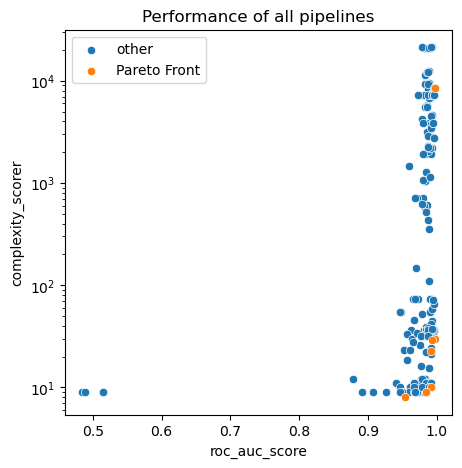

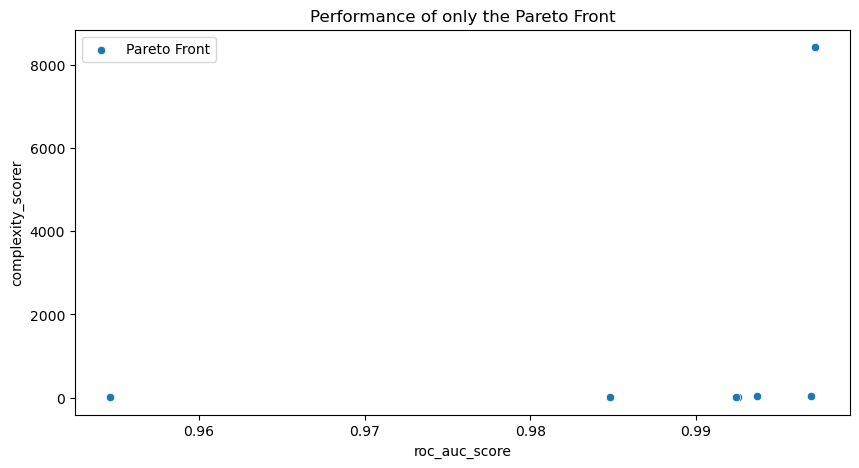

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#replace nans in pareto front with 0
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(df[df['Pareto_Front']!=1], x='roc_auc_score', y='complexity_scorer', label='other', ax=ax)
sns.scatterplot(df[df['Pareto_Front']==1], x='roc_auc_score', y='complexity_scorer', label='Pareto Front', ax=ax)
ax.title.set_text('Performance of all pipelines')
#log scale y
ax.set_yscale('log')
plt.show()

#replace nans in pareto front with 0
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(df[df['Pareto_Front']==1], x='roc_auc_score', y='complexity_scorer', label='Pareto Front', ax=ax)
ax.title.set_text('Performance of only the Pareto Front')
#log scale y
# ax.set_yscale('log')
plt.show()

In [7]:
#plot only the pareto front pipelines
sorted_pareto_front = df[df['Pareto_Front']==1].sort_values('roc_auc_score', ascending=False)
sorted_pareto_front

,roc_auc_score,complexity_scorer,Parents,Variation_Function,Individual,Generation,Submitted Timestamp,Completed Timestamp,Eval Error,Pareto_Front,Instance
218,0.997170,8430.2,"(89, 55)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,4.0,1.755053e+09,1.755053e+09,None,1.0,"(MaxAbsScaler(), VarianceThreshold(threshold=0..."
184,0.996967,29.8,"(143, 101)","ind_mutate , ind_mutate , ind_crossover",<tpot.search_spaces.pipelines.sequential.Seque...,3.0,1.755053e+09,1.755053e+09,None,1.0,"(MaxAbsScaler(), VarianceThreshold(threshold=0..."
226,0.993703,28.9,"(163, 163)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,4.0,1.755053e+09,1.755053e+09,None,1.0,"(MaxAbsScaler(), SelectFwe(alpha=0.03342699733..."
136,0.992541,22.7,"(55, 55)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,2.0,1.755053e+09,1.755053e+09,None,1.0,"(MaxAbsScaler(), SelectFromModel(estimator=Ext..."
158,0.992396,10.0,"(103, 103)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,3.0,1.755053e+09,1.755053e+09,None,1.0,"(RobustScaler(quantile_range=(0.0722927621978,..."
200,0.984818,9.0,"(176, 140)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,4.0,1.755053e+09,1.755053e+09,None,1.0,"(StandardScaler(), SelectFwe(alpha=0.000178719..."
237,0.954631,8.0,"(70, 70)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,4.0,1.755053e+09,1.755053e+09,None,1.0,"(Normalizer(norm=np.str_('l2')), VarianceThres..."


In [8]:
#access the best performing pipeline with the lowest complexity

best_pipeline_lowest_complexity = sorted_pareto_front.iloc[-1]['Instance']
best_pipeline_lowest_complexity

,steps,"[('normalizer', ...), ('variancethreshold', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,norm,np.str_('l2')
,copy,True
,threshold,0.000349697836
,transformer_list,"[('skiptransformer', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False


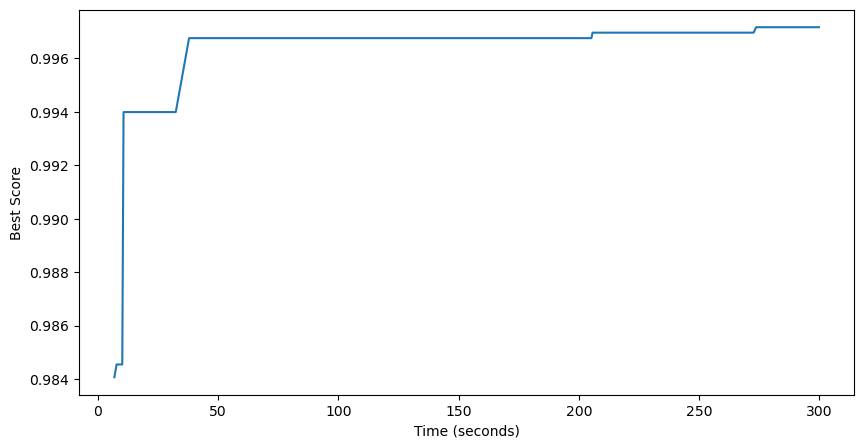

In [9]:
#get columns where roc_auc_score is not NaN
scores_and_times = df[df['roc_auc_score'].notna()][['roc_auc_score', 'Completed Timestamp']].sort_values('Completed Timestamp', ascending=True).to_numpy()

#get best score at a given time
best_scores = np.maximum.accumulate(scores_and_times[:,0])
times = scores_and_times[:,1]
times = times - df['Submitted Timestamp'].min()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(times, best_scores)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Best Score')
plt.show()


In [10]:
import dill as pickle
with open("best_pipeline.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

#load the pipeline
import dill as pickle
with open("best_pipeline.pkl", "rb") as f:
    my_loaded_best_pipeline = pickle.load(f)

In [11]:
my_loaded_best_pipeline
my_loaded_best_pipeline.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [12]:
tpot = est

In [13]:
from tpot.objectives import complexity_scorer
from sklearn.metrics import get_scorer
scorer = get_scorer('f1_weighted')

# supondo que 'scorer' é seu scorer de F1 original:
f1_scorer = scorer  
pipeline = tpot.fitted_pipeline_

f1_value   = f1_scorer(pipeline, X_test, y_test)       # milissegundos
complexity = complexity_scorer(pipeline)             # igualmente rápido

print(f"F1 = {f1_value:.4f}, Complexity = {complexity}")


F1 = 0.9791, Complexity = 8456


In [14]:
df = tpot.pareto_front
df = df[['roc_auc_score', 'complexity_scorer', 'Generation', 'Pareto_Front']]
df


,roc_auc_score,complexity_scorer,Generation,Pareto_Front
136,0.992541,22.7,2.0,1.0
158,0.992396,10.0,3.0,1.0
184,0.996967,29.8,3.0,1.0
200,0.984818,9.0,4.0,1.0
218,0.997170,8430.2,4.0,1.0
226,0.993703,28.9,4.0,1.0
237,0.954631,8.0,4.0,1.0
